In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch, Wedge
import matplotlib.colors as mcolors
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay


# Fig 4a

In [2]:
df4a1 = pd.read_excel('Fig4a.xlsx',sheet_name='shap',index_col=0)
df4a2 = pd.read_excel('Fig4a.xlsx',sheet_name='auc')

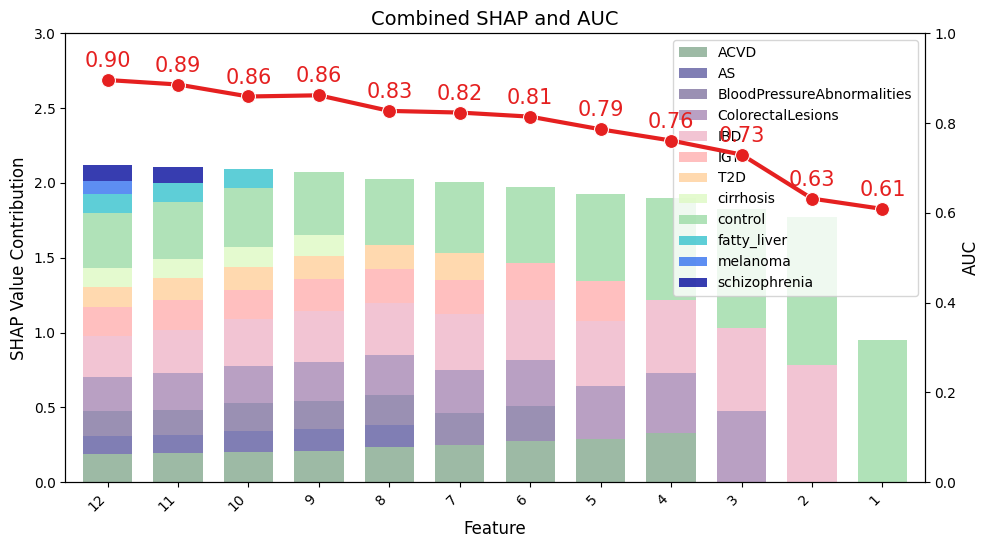

In [3]:
custom_palette = {
    "control": "#85A98F",  
    "IBD": "#605EA1",  
    "ColorectalLesions": "#8174A0",  
    "IGT": "#A888B5",  
    "BloodPressureAbnormalities": "#EFB6C8",
    "ACVD": "#FFB0B0",
    "T2D": "#FFD09B",
    "cirrhosis": "#DEF9C4",
    "fatty_liver": "#9CDBA6",
    "AS": "#36C2CE",
    "schizophrenia": "#3572EF",
    "melanoma": "#050C9C"
}

colors = list(custom_palette.values())
colors_with_alpha = [mcolors.to_rgba(c, alpha=0.8) for c in colors]
custom_cmap = ListedColormap(colors)

features = df4a1.columns

fig, ax1 = plt.subplots(figsize=(10,6))

df4a1.T.plot(kind='bar', stacked=True, ax=ax1, 
                   color=colors_with_alpha, width=0.7, alpha=0.8)

ax1.set_xlabel("Feature", fontsize=12)
ax1.set_ylabel("SHAP Value Contribution", fontsize=12)
ax1.set_title("Combined SHAP and AUC", fontsize=14)

ax1.set_xticklabels(features, rotation=45, ha='right')
ax1.set_ylim(0,3)
ax2 = ax1.twinx()

# 绘制 AUC 折线图在 ax2 上
sns.lineplot(data=df4a2.sort_values("id", ascending=False), 
             x="id", y="AUC", marker='o', markersize=10, 
             color="#E52020", linewidth=3, ax=ax2)
ax2.set_ylabel("AUC", fontsize=12)
ax2.set_ylim(0,1)

for idx, row in df4a2.iterrows():
    ax2.text(row['id'], row['AUC'] + 0.02, f'{row["AUC"]:.2f}', 
             ha='center', va='bottom', fontsize=15, color="#E52020")

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig("Fig4a.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()


# Fig 4bc

In [4]:
df4b1 = pd.read_excel('./Fig4bc.xlsx',sheet_name='cv_label',index_col=0)
df4b2 = pd.read_excel('./Fig4bc.xlsx',sheet_name='cv_prob',index_col=0)
df4c1 = pd.read_excel('./Fig4bc.xlsx',sheet_name='test_label',index_col=0)
df4c2 = pd.read_excel('./Fig4bc.xlsx',sheet_name='test_prob',index_col=0)


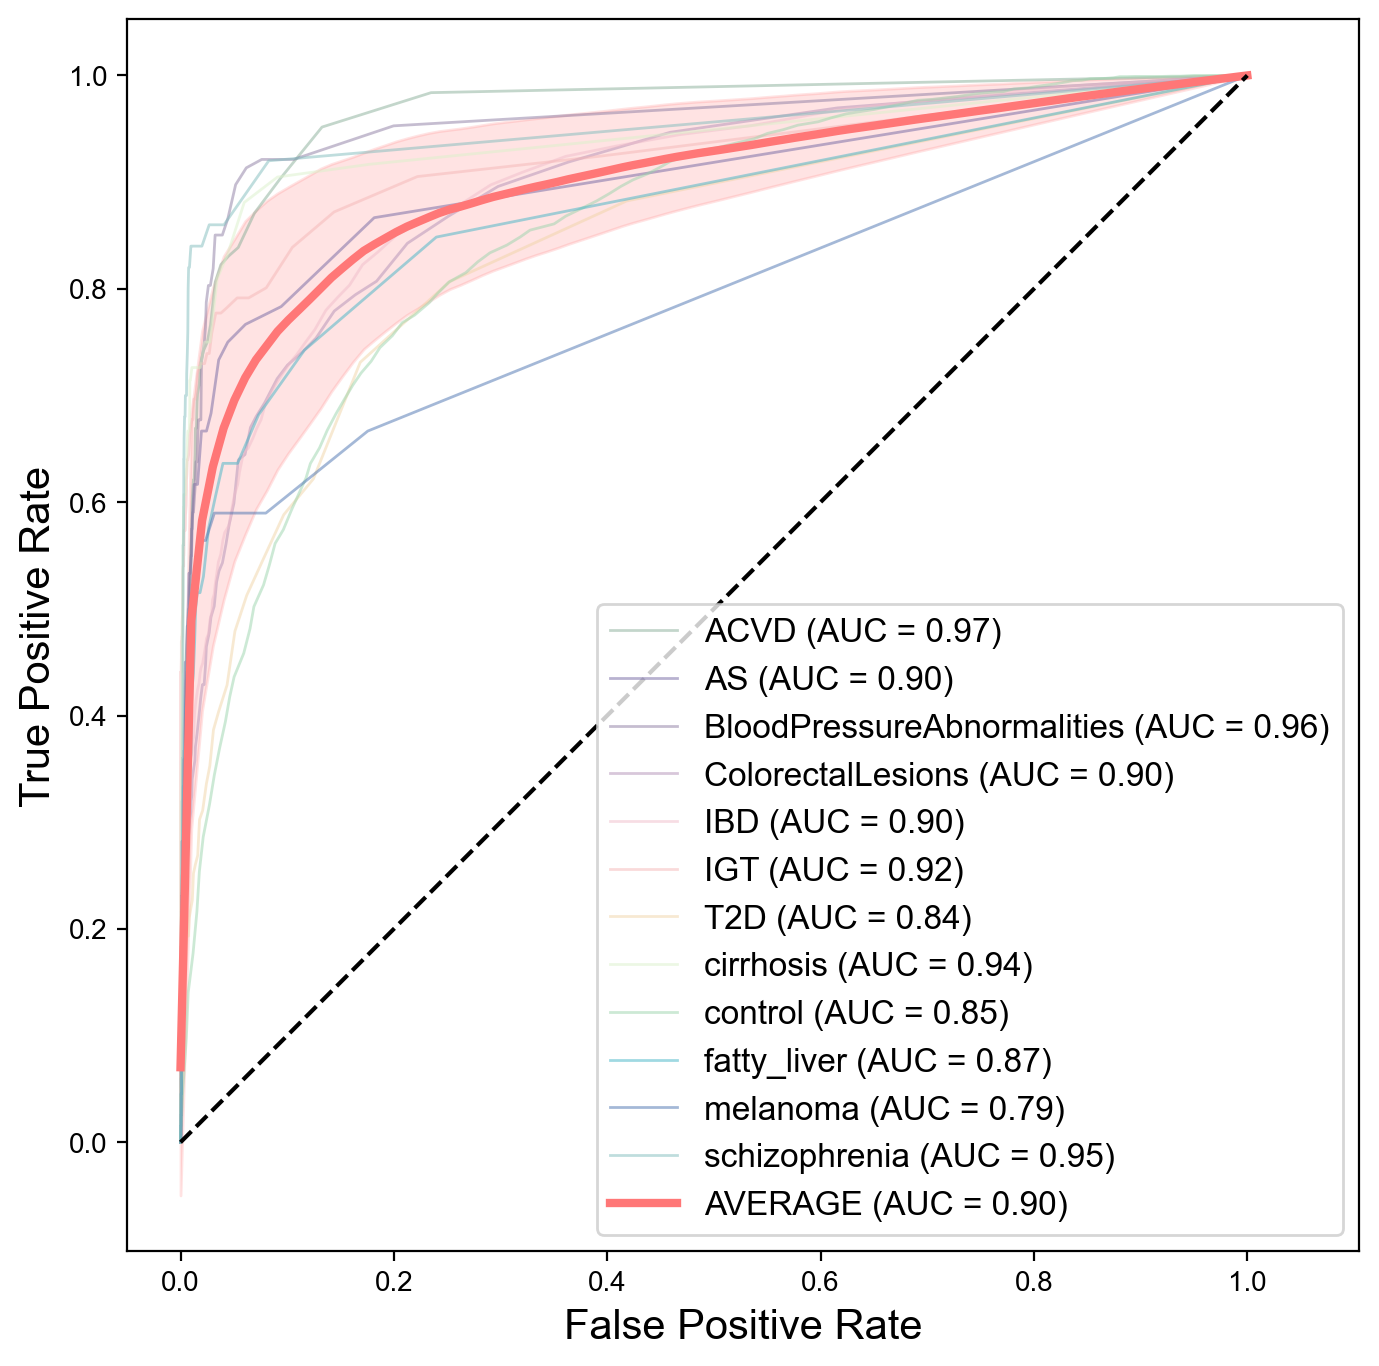

In [5]:
phenotype_sorted = df4b1.columns
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(8, 8), dpi=200)
ax = plt.gca()
macaron_colors_deep = [
    '#89AE98', '#7266A3', '#8D7CA3', '#B290B7', '#F0BDCB', '#F5B7B6',
    '#F1D4A6', '#DBF1CA', '#9BD4AC', '#42B4C6', '#4B73B0', '#80BCBD'
]
fpr_all = []
tpr_all = []
roc_auc_all = []

for i,phenotype in enumerate(phenotype_sorted):
    
    fpr, tpr, _ = roc_curve(df4b1[f'{phenotype}'], df4b2[f'{phenotype}'])
    roc_auc = auc(fpr, tpr)
    

    fpr_all.append(fpr)
    tpr_all.append(tpr)
    roc_auc_all.append(roc_auc)

    RocCurveDisplay.from_predictions(df4b1[f'{phenotype}'],df4b2[f'{phenotype}'], ax=ax,  alpha=0.5,linewidth=1, name=f"{phenotype}",color=macaron_colors_deep[i % len(macaron_colors_deep)])

mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)

for fpr, tpr in zip(fpr_all, tpr_all):
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

mean_tpr /= len(fpr_all)
mean_auc = auc(mean_fpr, mean_tpr)
tpr_std = np.zeros_like(mean_fpr)
for fpr, tpr in zip(fpr_all, tpr_all):
    tpr_std += (np.interp(mean_fpr, fpr, tpr) - mean_tpr) ** 2

tpr_std = np.sqrt(tpr_std / len(fpr_all))

RocCurveDisplay(fpr=mean_fpr, tpr=mean_tpr, roc_auc=mean_auc, estimator_name=f"AVERAGE").plot(ax=ax,linewidth=3,color = '#FF7777')
ax.fill_between(mean_fpr, mean_tpr - tpr_std, mean_tpr + tpr_std, color='#FF7777', alpha=0.2)


plt.plot([0, 1], [0, 1], "k--")


plt.axis("square")
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.legend(fontsize=12)
plt.savefig("Fig4b.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()


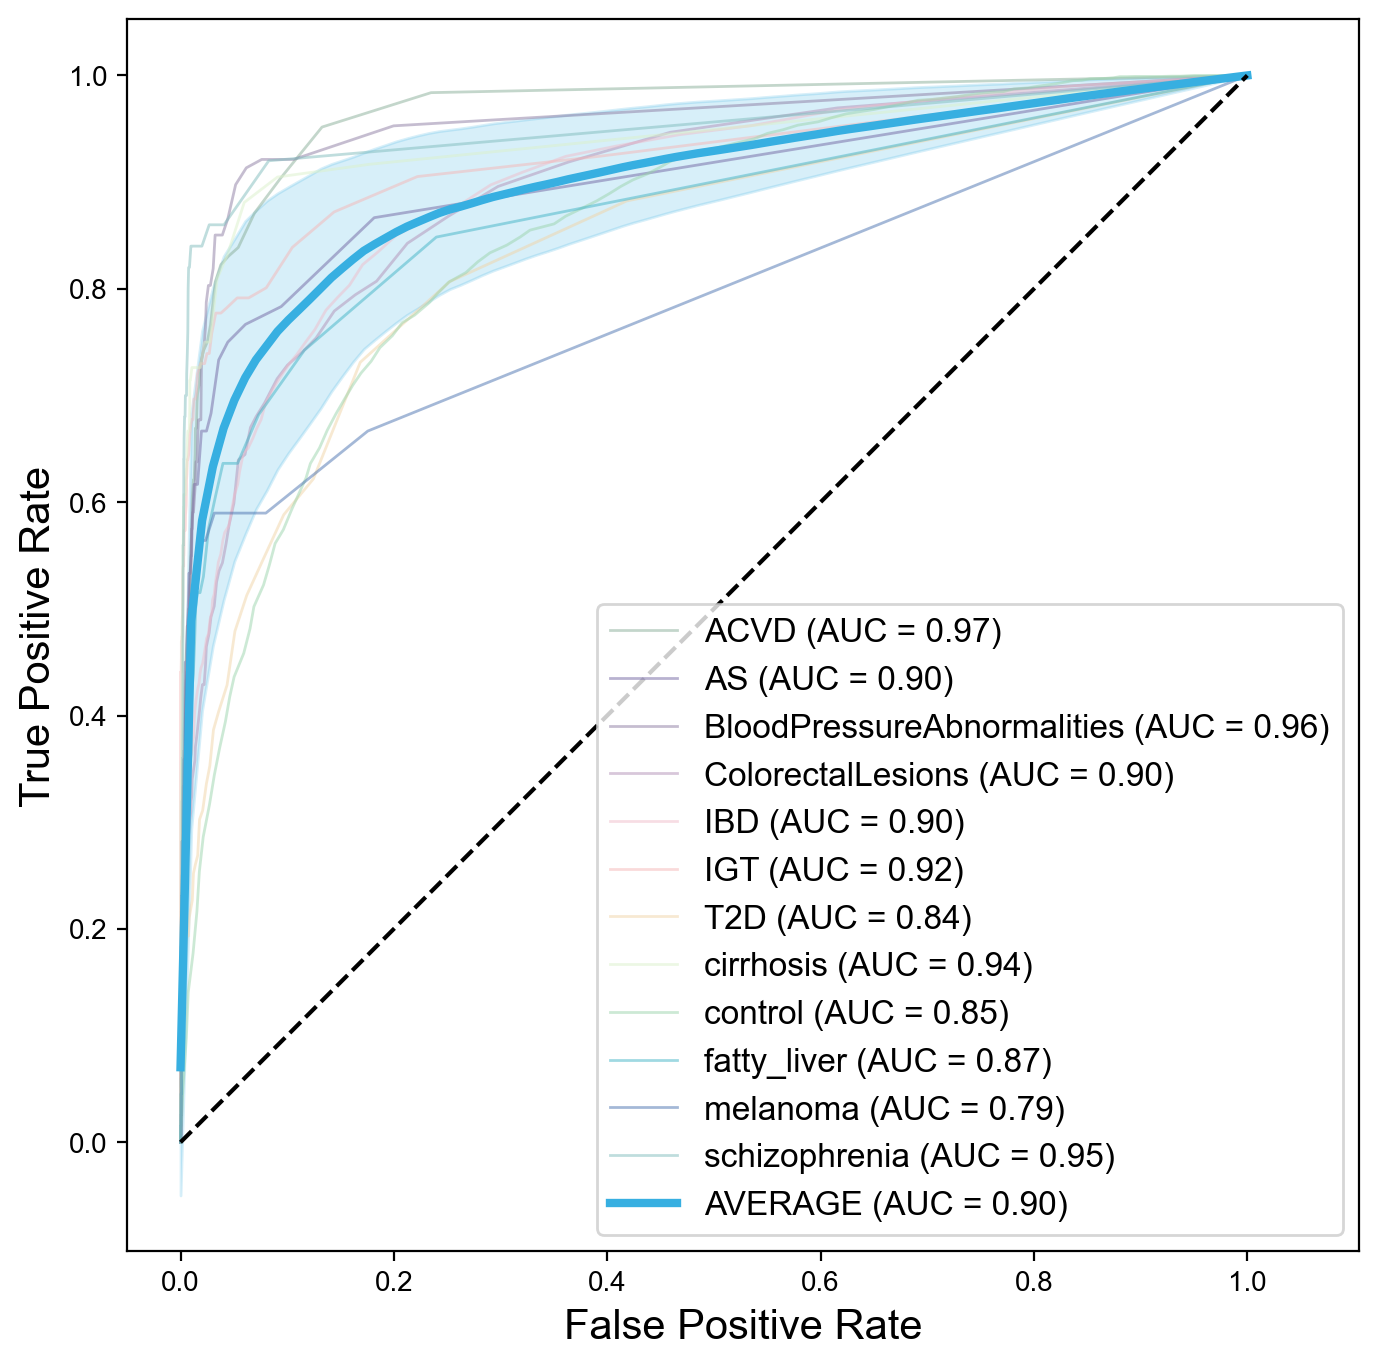

In [6]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(8, 8), dpi=200)
ax = plt.gca()
macaron_colors_deep = [
    '#89AE98', '#7266A3', '#8D7CA3', '#B290B7', '#F0BDCB', '#F5B7B6',
    '#F1D4A6', '#DBF1CA', '#9BD4AC', '#42B4C6', '#4B73B0', '#80BCBD'
]
fpr_all = []
tpr_all = []
roc_auc_all = []

for i,phenotype in enumerate(phenotype_sorted):
    fpr, tpr, _ = roc_curve(df4b1[f'{phenotype}'], df4b2[f'{phenotype}'])
    roc_auc = auc(fpr, tpr)
    

    fpr_all.append(fpr)
    tpr_all.append(tpr)
    roc_auc_all.append(roc_auc)

    RocCurveDisplay.from_predictions(df4b1[f'{phenotype}'],df4b2[f'{phenotype}'], ax=ax,  alpha=0.5,linewidth=1, name=f"{phenotype}",color=macaron_colors_deep[i % len(macaron_colors_deep)])

mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)

for fpr, tpr in zip(fpr_all, tpr_all):
    mean_tpr += np.interp(mean_fpr, fpr, tpr)

mean_tpr /= len(fpr_all)
mean_auc = auc(mean_fpr, mean_tpr)
tpr_std = np.zeros_like(mean_fpr)
for fpr, tpr in zip(fpr_all, tpr_all):
    tpr_std += (np.interp(mean_fpr, fpr, tpr) - mean_tpr) ** 2

tpr_std = np.sqrt(tpr_std / len(fpr_all))

RocCurveDisplay(fpr=mean_fpr, tpr=mean_tpr, roc_auc=mean_auc, estimator_name=f"AVERAGE").plot(ax=ax,linewidth=3,color = '#37AFE1')
ax.fill_between(mean_fpr, mean_tpr - tpr_std, mean_tpr + tpr_std, color='#37AFE1', alpha=0.2)


plt.plot([0, 1], [0, 1], "k--")

plt.axis("square")
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.legend(fontsize=12)
plt.savefig("Fig4c.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()


# Fig 4d

In [7]:
df5d = pd.read_csv('./Fig4d.csv',index_col=0)

In [8]:

indicies = df5d.columns
categories = df5d.index
n_indicies = len(indicies)

angles = np.linspace(0, 2 * np.pi, n_indicies, endpoint=False).tolist()
angles += angles[:1]  # 闭合雷达图

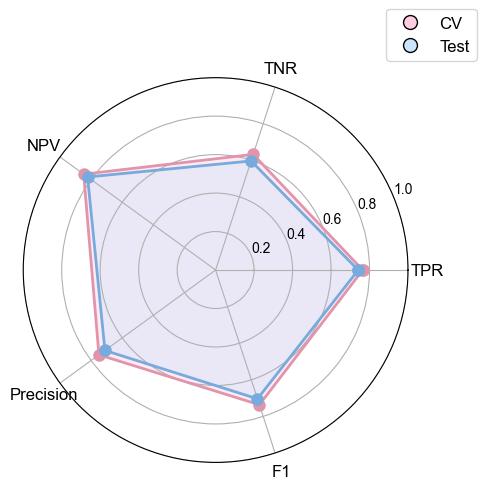

In [10]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))
colors = ['#FFCCE1', '#CCE5FF']
line_colors = ['#E195AB', '#77AADD']

# 遍历每个指标并绘制
for i, dataset in enumerate(categories):
    # 数据
    values = df5d.loc[dataset,].values.tolist()
    values += values[:1]  

    # 绘制雷达图
    ax.fill(angles, values, color=colors[i], alpha=0.4, label=dataset)
    ax.plot(angles, values, color=line_colors[i], linewidth=2,marker='o', markersize=8, label=f"{dataset}")

ax.set_xticks(angles[:-1])
ax.set_xticklabels(indicies, fontsize=12)
ax.set_ylim(0,1)

plt.draw()
ax.tick_params(axis='y', labelsize=10)

# 显示图例
legend_handles = [
    Line2D([0], [0], color='none', marker='o', markersize=10, markerfacecolor=colors[i], label=categories[i])
    for i in range(len(categories))
]

ax.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.2, 1.2), fontsize=12)

# 显示图表
plt.tight_layout()
plt.savefig("Fig4d.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()

# Fig 4ef

In [3]:
df4e = pd.read_excel('Fig4ef.xlsx',sheet_name='FPR',index_col=0)
df4f = pd.read_excel('Fig4ef.xlsx',sheet_name='FNR',index_col=0)

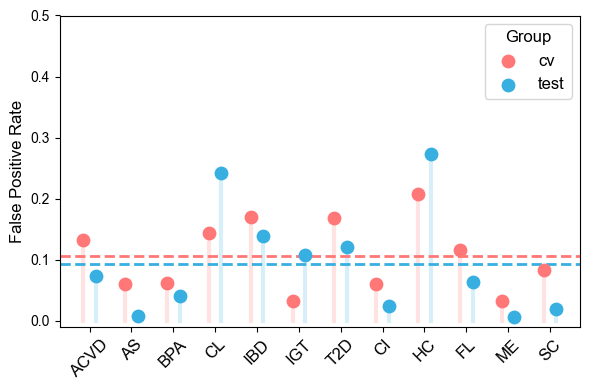

In [5]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42

# 定义分组的自定义颜色
group_colors = {'cv': '#FF7777',    # 蓝色
                'test': '#37AFE1'}  # 橙色

# 设置图表
fig, ax = plt.subplots(figsize=(6,4))

# x 轴位置：每个表型一个位置
x = np.arange(len(df4e))
offset = 0.15  # 分组在同一表型内的水平偏移量

# 绘制每个分组的棒棒糖图
for group in ['cv', 'test']:
    # 根据分组调整 x 轴位置，cv 左移，test 右移
    if group == 'cv':
        x_pos = x - offset
    else:
        x_pos = x + offset
    # 绘制从 0 到假阳性率的垂直线段
    for xi, fpr in zip(x_pos, df4e[group]):
        ax.plot([xi, xi], [0, fpr], color=group_colors[group], lw=3,alpha = 0.2)
    # 绘制标记点
    ax.scatter(x_pos, df4e[group], color=group_colors[group], s=80, zorder=3, label=group)

# 设置横轴刻度与标签
ax.set_xticks(x)
ax.set_xticklabels(df4e.index, rotation=45, fontsize=12)
ax.set_ylabel("False Positive Rate", fontsize=12)
#ax.set_title("Grouped Lollipop Chart of False Positive Rate by Phenotype", fontsize=14)
ax.set_ylim(-0.01,0.5)
# 添加图例（避免重复图例项）
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title="Group", fontsize=12, title_fontsize=12)

cv_mean = df4e['cv'].mean()
test_mean = df4e['test'].mean()

ax.axhline(cv_mean, color='#FF7777', linestyle='--', linewidth=2, label='CV Mean')
ax.axhline(test_mean, color='#37AFE1', linestyle='--', linewidth=2, label='Test Mean')

plt.tight_layout()
plt.savefig('./Fig4e.pdf', dpi=300, bbox_inches='tight', transparent=True, format='pdf')
  
plt.show()


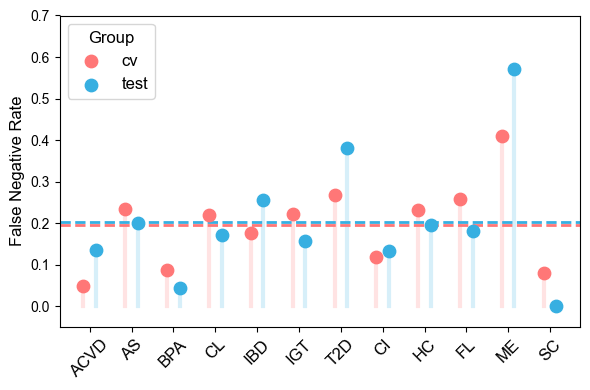

In [6]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42

# 定义分组的自定义颜色
group_colors = {'cv': '#FF7777',    # 蓝色
                'test': '#37AFE1'}  # 橙色

# 设置图表
fig, ax = plt.subplots(figsize=(6,4))

# x 轴位置：每个表型一个位置
x = np.arange(len(df4f))
offset = 0.15  # 分组在同一表型内的水平偏移量

# 绘制每个分组的棒棒糖图
for group in ['cv', 'test']:
    # 根据分组调整 x 轴位置，cv 左移，test 右移
    if group == 'cv':
        x_pos = x - offset
    else:
        x_pos = x + offset
    # 绘制从 0 到假阳性率的垂直线段
    for xi, fpr in zip(x_pos, df4f[group]):
        ax.plot([xi, xi], [0, fpr], color=group_colors[group], lw=3,alpha = 0.2)
    # 绘制标记点
    ax.scatter(x_pos, df4f[group], color=group_colors[group], s=80, zorder=3, label=group)

# 设置横轴刻度与标签
ax.set_xticks(x)
ax.set_xticklabels(df4f.index, rotation=45, fontsize=12)
ax.set_ylabel("False Negative Rate", fontsize=12)
#ax.set_title("Grouped Lollipop Chart of False Positive Rate by Phenotype", fontsize=14)
ax.set_ylim(-0.05,0.7)
# 添加图例（避免重复图例项）
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title="Group", fontsize=12, title_fontsize=12)

cv_mean = df4f['cv'].mean()
test_mean = df4f['test'].mean()

ax.axhline(cv_mean, color='#FF7777', linestyle='--', linewidth=2, label='CV Mean')
ax.axhline(test_mean, color='#37AFE1', linestyle='--', linewidth=2, label='Test Mean')

plt.tight_layout()
plt.savefig('./Fig4f.pdf', dpi=300, bbox_inches='tight', transparent=True, format='pdf')
  
plt.show()
